# Mobile Phone Brand Analysis
## By Nathan Chau-Nguyen


Set up data and libraries needed for analysis

In [144]:
%load_ext sql
%sql sqlite:///MobileDatabase.db
%config SqlMagic.style = '_DEPRECATED_DEFAULT'




    


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [145]:
import pandas as pd
import matplotlib.pyplot as plt


connection = sqlite3.Connection("MobileDatabase.db")
cursor = connection.cursor()

df = pd.read_csv("Mobiles Dataset (2025).csv", encoding="latin1")
df.to_sql("Mobile", connection, if_exists="replace", index=False)

930

Clean instances where values are formated weridly 

In [146]:
%%sql
UPDATE Mobile SET "Launched Price (USA)" = "USD 396.22" WHERE "Launched Price (USA)" = "USD 396,22";
UPDATE Mobile SET "RAM" = "12GB" WHERE "RAM" = "8GB / 12GB";

 * sqlite:///MobileDatabase.db
1 rows affected.
2 rows affected.


[]

Clean table to find average price per brand

In [147]:
%%sql 
SELECT "Company Name", "Launched Price (USA)", CAST(AVG(CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS INT)) AS INT) AS AVGPRICE 
FROM Mobile GROUP BY "Company Name"
ORDER BY AvgPrice ;



 * sqlite:///MobileDatabase.db
Done.


Company Name,Launched Price (USA),AVGPRICE
Nokia,USD 229,194
Infinix,USD 299,245
Realme,USD 470,273
Poco,USD 280,290
POCO,USD 499,309
Lenovo,USD 499,311
iQOO,USD 349,399
Motorola,USD 499,433
Vivo,USD 999,469
Tecno,USD 129,471


Project findings via bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

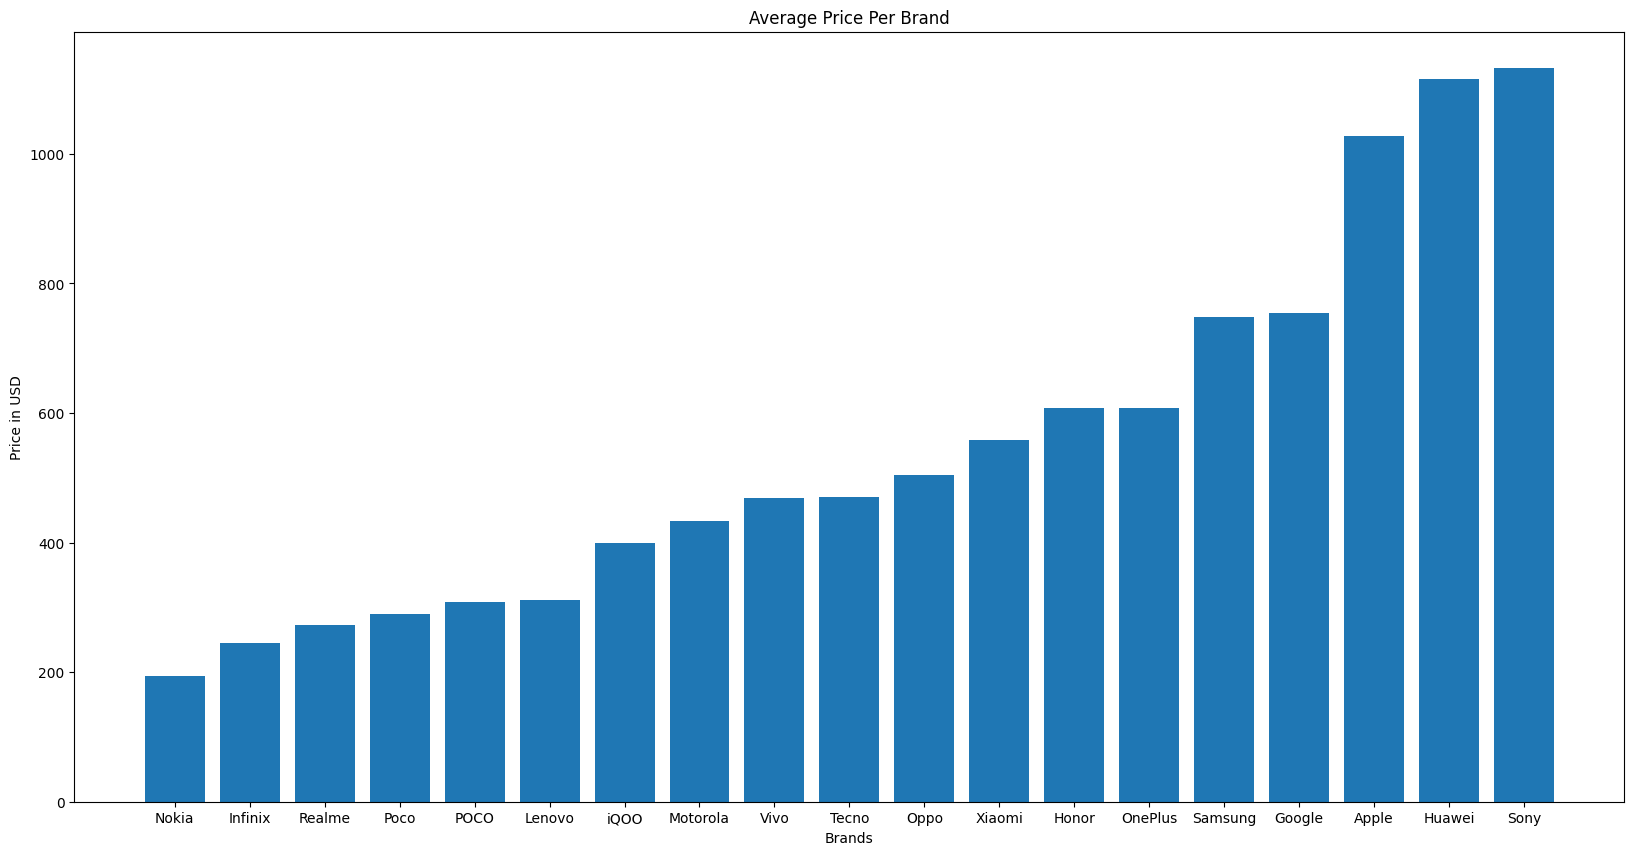

In [148]:
query = """
SELECT "Company Name", "Launched Price (USA)", CAST(AVG(CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS INT)) AS INT) AS AVGPRICE 
FROM Mobile GROUP BY "Company Name"
ORDER BY AvgPrice ;
"""
AvgPrice = pd.read_sql(query, connection)

plt.figure(figsize=(20,10))
plt.bar(AvgPrice["Company Name"], AvgPrice["AVGPRICE"])
plt.title("Average Price Per Brand")
plt.ylabel("Price in USD")
plt.xlabel("Brands")
plt.show


Clean the data to identify the brand with the highest RAM.

In [149]:
%%sql

SELECT "Company Name", "Model Name",  RAM, MAX(CAST(REPLACE("RAM", "GB", "") AS INT)) AS MostRam
FROM Mobile GROUP BY "Company Name" 
ORDER BY "MostRam" 


 * sqlite:///MobileDatabase.db
Done.


Company Name,Model Name,RAM,MostRam
Nokia,G21 128GB,6GB,6
Apple,iPhone 16 Pro 256GB,8GB,8
POCO,F4 GT 128GB,8GB,8
Poco,Pad 5G 128GB,8GB,8
iQOO,Pad 2 256GB,8GB,8
Infinix,Xpad Pro,12GB,12
Motorola,Edge 50 Fusion 256GB,12GB,12
Samsung,Galaxy S24 Ultra 128GB,12GB,12
Sony,Xperia 1 IV 256GB,12GB,12
Tecno,Phantom V Fold2 512GB,12GB,12


Project findings via bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

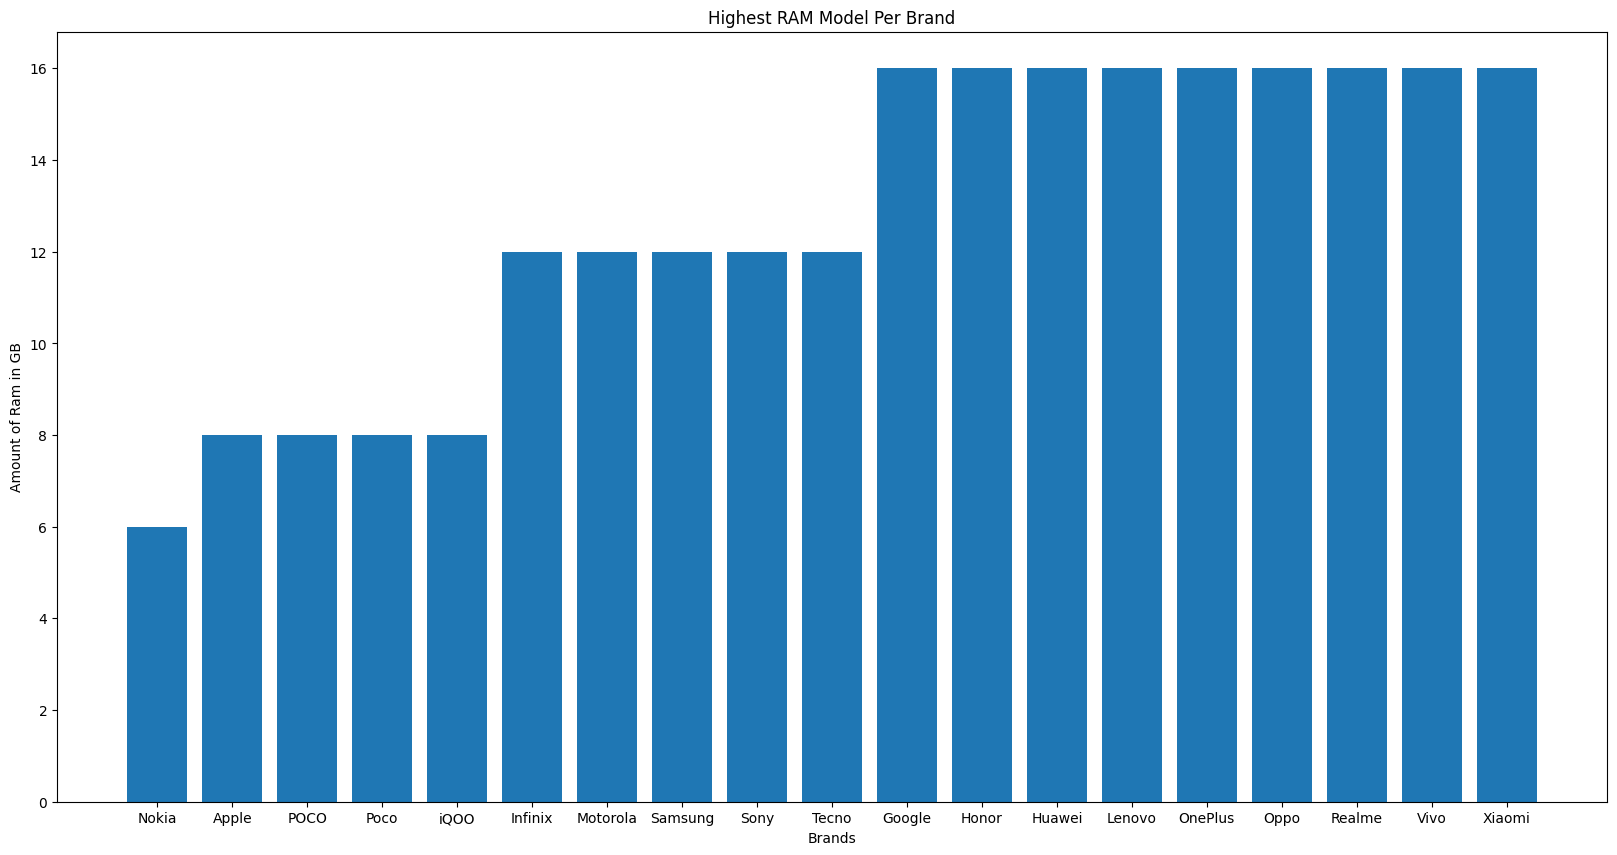

In [150]:
query = """
SELECT "Company Name", "Model Name",  RAM, MAX(CAST(REPLACE("RAM", "GB", "") AS INT)) AS MostRam
FROM Mobile GROUP BY "Company Name" 
ORDER BY "MostRam"
"""

MaxRam = pd.read_sql(query, connection)
MaxRam.head()

plt.figure(figsize=(20,10))
plt.bar(MaxRam["Company Name"], MaxRam["MostRam"])
plt.title("Highest RAM Model Per Brand")
plt.ylabel("Amount of Ram in GB")
plt.xlabel("Brands")
plt.show

Clean the data to identify the brand with the highest battery capacity.

In [151]:
%%sql

SELECT "Company Name", "Model Name", "Battery Capacity", MAX(CAST(REPLACE(REPLACE("Battery Capacity", ",", ""), "mAh","") AS INT)) AS BatteryCap
FROM Mobile GROUP BY "Company Name" 
ORDER BY "BatteryCap";


 * sqlite:///MobileDatabase.db
Done.


Company Name,Model Name,Battery Capacity,BatteryCap
Motorola,Edge 50 Fusion 128GB,"5,000mAh",5000
Sony,Xperia 1 IV 256GB,"5,000mAh",5000
Lenovo,Legion Y70 128GB,"5,100mAh",5100
Google,Pixel 9 Pro Fold 512GB,"5,500mAh",5500
POCO,M3 64GB,6000mAh,6000
Xiaomi,Xiaomi 15 Pro 256GB,"6,100mAh",6100
Tecno,Megapad 11 256GB,"8,000mAh",8000
Vivo,Pad 128GB,8040mAh,8040
iQOO,Pad 128GB,8040mAh,8040
Nokia,T21,8200mAh,8200


Project findings via bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

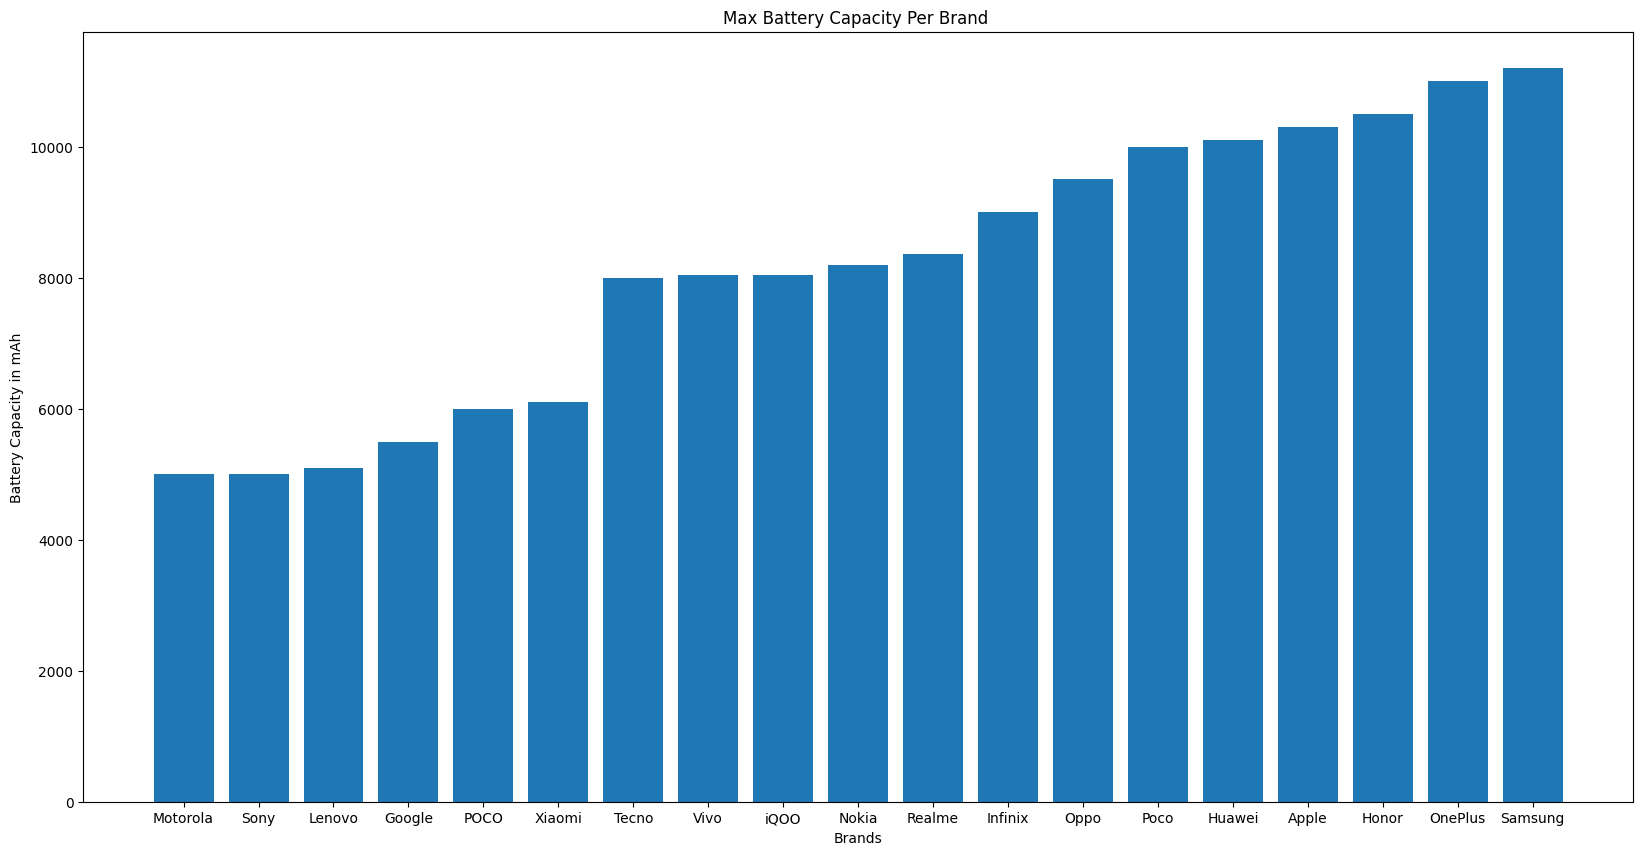

In [154]:
query = """
SELECT "Company Name", "Model Name", "Battery Capacity", MAX(CAST(REPLACE(REPLACE("Battery Capacity", ",", ""), "mAh","") AS INT)) AS BatteryCap
FROM Mobile GROUP BY "Company Name" 
ORDER BY "BatteryCap";
"""
BatteryLife = pd.read_sql(query, connection)

plt.figure(figsize=(20,10))
plt.bar(BatteryLife["Company Name"], BatteryLife["BatteryCap"])
plt.title("Max Battery Capacity Per Brand ")
plt.ylabel("Battery Capacity in mAh")
plt.xlabel("Brands")
plt.show

Clean the data to identify the brand with the largest screen sizes.

In [155]:
%%sql

SELECT "Company Name", "Model Name", "Screen Size", MAX(CAST(REPLACE(REPLACE("Screen Size", ",", ""), " inches","") AS FLOAT)) AS ScreenSize
FROM Mobile GROUP BY "Company Name" 
ORDER BY "ScreenSize";

 * sqlite:///MobileDatabase.db
Done.


Company Name,Model Name,Screen Size,ScreenSize
Sony,Xperia 1 IV 256GB,6.5 inches,6.5
Xiaomi,Xiaomi 15 Pro 256GB,6.73 inches,6.73
POCO,M6 Pro 128GB,6.79 inches,6.79
Lenovo,K13 Pro 128GB,6.8 inches,6.8
Motorola,Razr 50 Ultra 512GB,"6.9 inches (internal), 4.0 inches (external)",6.9
Google,Pixel 9 Pro Fold 512GB,7.6 inches,7.6
Nokia,T21,10.4 inches,10.4
Infinix,Xpad Pro,11.0 inches,11.0
Tecno,Megapad 11 256GB,11 inches,11.0
Realme,Pad 2 128GB,11.5 inches,11.5


Project findings via bar graph

<function matplotlib.pyplot.show(close=None, block=None)>

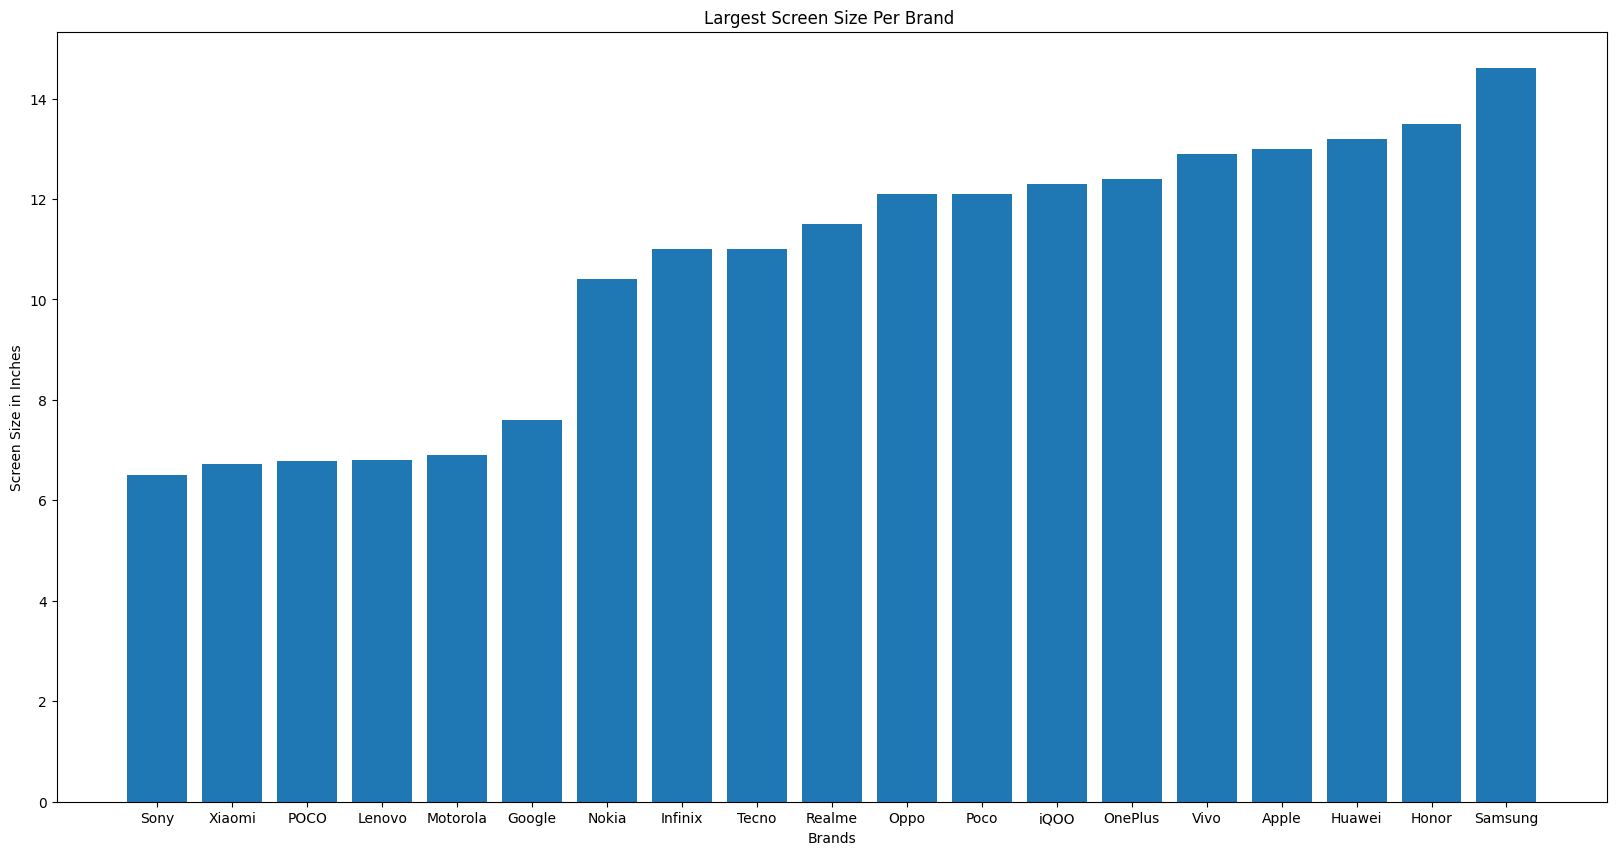

In [156]:
query = """
SELECT "Company Name", "Model Name", "Screen Size", MAX(CAST(REPLACE(REPLACE("Screen Size", ",", ""), " inches","") AS FLOAT)) AS ScreenSize
FROM Mobile GROUP BY "Company Name" 
ORDER BY "ScreenSize";
"""
ScreenSize = pd.read_sql(query, connection)

plt.figure(figsize=(20,10))
plt.bar(ScreenSize["Company Name"], ScreenSize["ScreenSize"])
plt.title("Largest Screen Size Per Brand ")
plt.ylabel("Screen Size in Inches")
plt.xlabel("Brands")
plt.show

Clean data to find brands best RAM to price ratio

In [157]:
%%sql
SELECT "Company Name", "Model Name", 
CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS INT) AS PRICE,
CAST(REPLACE("RAM", "GB", "") AS INT) AS RAM,
CAST((CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS INT)/CAST(REPLACE("RAM", "GB", "") AS INT)) AS INT) AS RAMRATIO
FROM Mobile m WHERE RAMRATIO = (SELECT MIN(CAST(CAST(REPLACE(REPLACE("Launched Price (USA)", 'USD ', ''), ',', '') AS INT) / 
                     CAST(REPLACE(RAM, 'GB', '') AS INT) AS INT)) FROM Mobile WHERE "Company Name" = m."Company Name")
GROUP BY "Company Name"
ORDER BY RAMRATIO;

 * sqlite:///MobileDatabase.db
Done.


Company Name,Model Name,PRICE,RAM,RAMRATIO
Oppo,K11x 256GB,229,12,19
Realme,P1 Speed 5G 256GB,270,12,22
Infinix,Hot 40,199,8,24
Xiaomi,Redmi Note 14 Pro+ 5G 512GB,429,16,26
Samsung,Galaxy Tab A9+ 128GB,229,8,28
Honor,Play 6,179,6,29
Motorola,G84 5G 256GB,349,12,29
Tecno,Pop 9 64GB,89,3,29
Vivo,Y33s 128GB,239,8,29
Nokia,G21 128GB,189,6,31


Present findings via line graph

<function matplotlib.pyplot.show(close=None, block=None)>

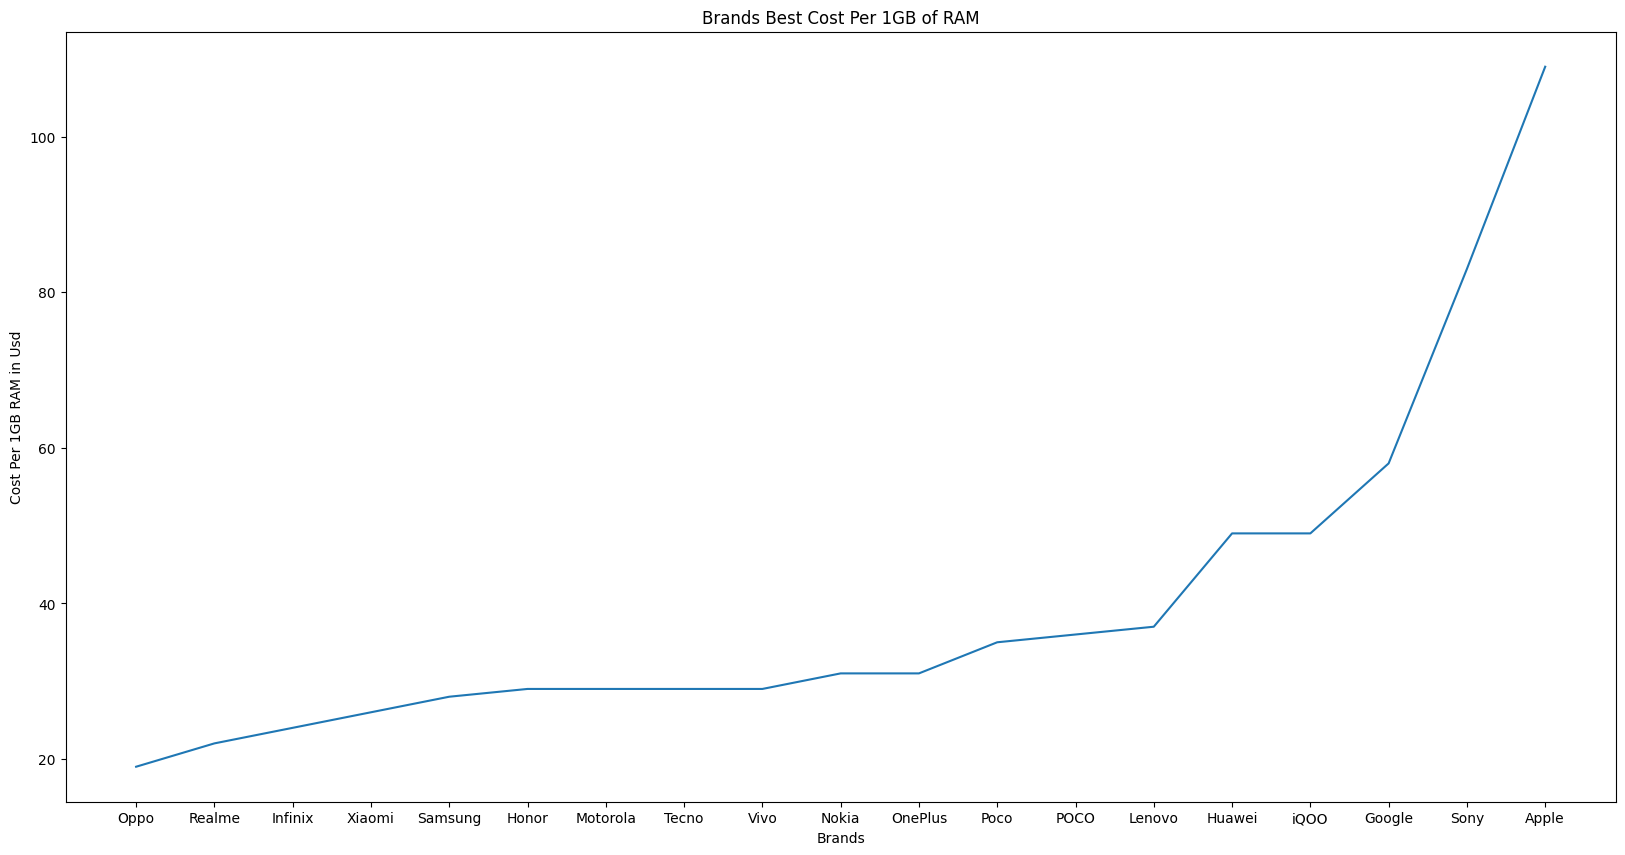

In [158]:
query = """
SELECT "Company Name", "Model Name", 
CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS INT) AS PRICE,
CAST(REPLACE("RAM", "GB", "") AS INT) AS RAM,
CAST((CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS INT)/CAST(REPLACE("RAM", "GB", "") AS INT)) AS INT) AS RAMRATIO
FROM Mobile m WHERE RAMRATIO = (SELECT MIN(CAST(CAST(REPLACE(REPLACE("Launched Price (USA)", 'USD ', ''), ',', '') AS INT) / 
                     CAST(REPLACE(RAM, 'GB', '') AS INT) AS INT)) FROM Mobile WHERE "Company Name" = m."Company Name")
GROUP BY "Company Name"
ORDER BY RAMRATIO;
"""
RamRatio = pd.read_sql(query, connection)

plt.figure(figsize=(20,10))
plt.plot(RamRatio["Company Name"], RamRatio["RAMRATIO"])
plt.title("Brands Best Cost Per 1GB of RAM")
plt.ylabel("Cost Per 1GB RAM in Usd")
plt.xlabel("Brands")
plt.show


Clean data to find brands best battery capacity to price ratio

In [169]:
%%sql
SELECT "Company Name", "Model Name", 
CAST(REPLACE(REPLACE("Launched Price (USA)", 'USD ', ''), ',', '') AS INT) AS PRICE, 
CAST(REPLACE(REPLACE("Battery Capacity", ',', ''), 'mAh', '') AS INT) AS BatteryCap,
CAST(CAST(CAST(REPLACE(REPLACE("Battery Capacity", ',', ''), 'mAh', '') AS FLOAT)/REPLACE(REPLACE("Launched Price (USA)", 'USD ', ''), ',', '') AS FLOAT) AS INT) AS BATRATIO
FROM Mobile m WHERE BATRATIO = (SELECT MAX(CAST(CAST(CAST(REPLACE(REPLACE("Battery Capacity", ',', ''), 'mAh', '') AS FLOAT)/REPLACE(REPLACE("Launched Price (USA)", 'USD ', ''), ',', '') AS FLOAT) AS INT)) FROM Mobile WHERE "Company Name" = m."Company Name")
GROUP BY "Company Name"
ORDER BY BATRATIO;

 * sqlite:///MobileDatabase.db
Done.


Company Name,Model Name,PRICE,BatteryCap,BATRATIO
Google,Pixel 5a 128GB,449,4680,10
Sony,Xperia 10 IV 128GB,499,5000,10
Huawei,Nova 10 SE,399,4500,11
iQOO,Pad 128GB,349,8040,23
Xiaomi,Redmi 14C 5G 64GB,199,5000,25
Apple,iPad 10.2-inch 32GB,329,8612,26
OnePlus,OnePlus Nord N100 64GB,179,5000,27
Oppo,A49 5G 128GB,129,4000,31
Lenovo,K13 32GB,149,5000,33
Motorola,Moto G Play 32GB,149,5000,33


Present findings via line graph

<function matplotlib.pyplot.show(close=None, block=None)>

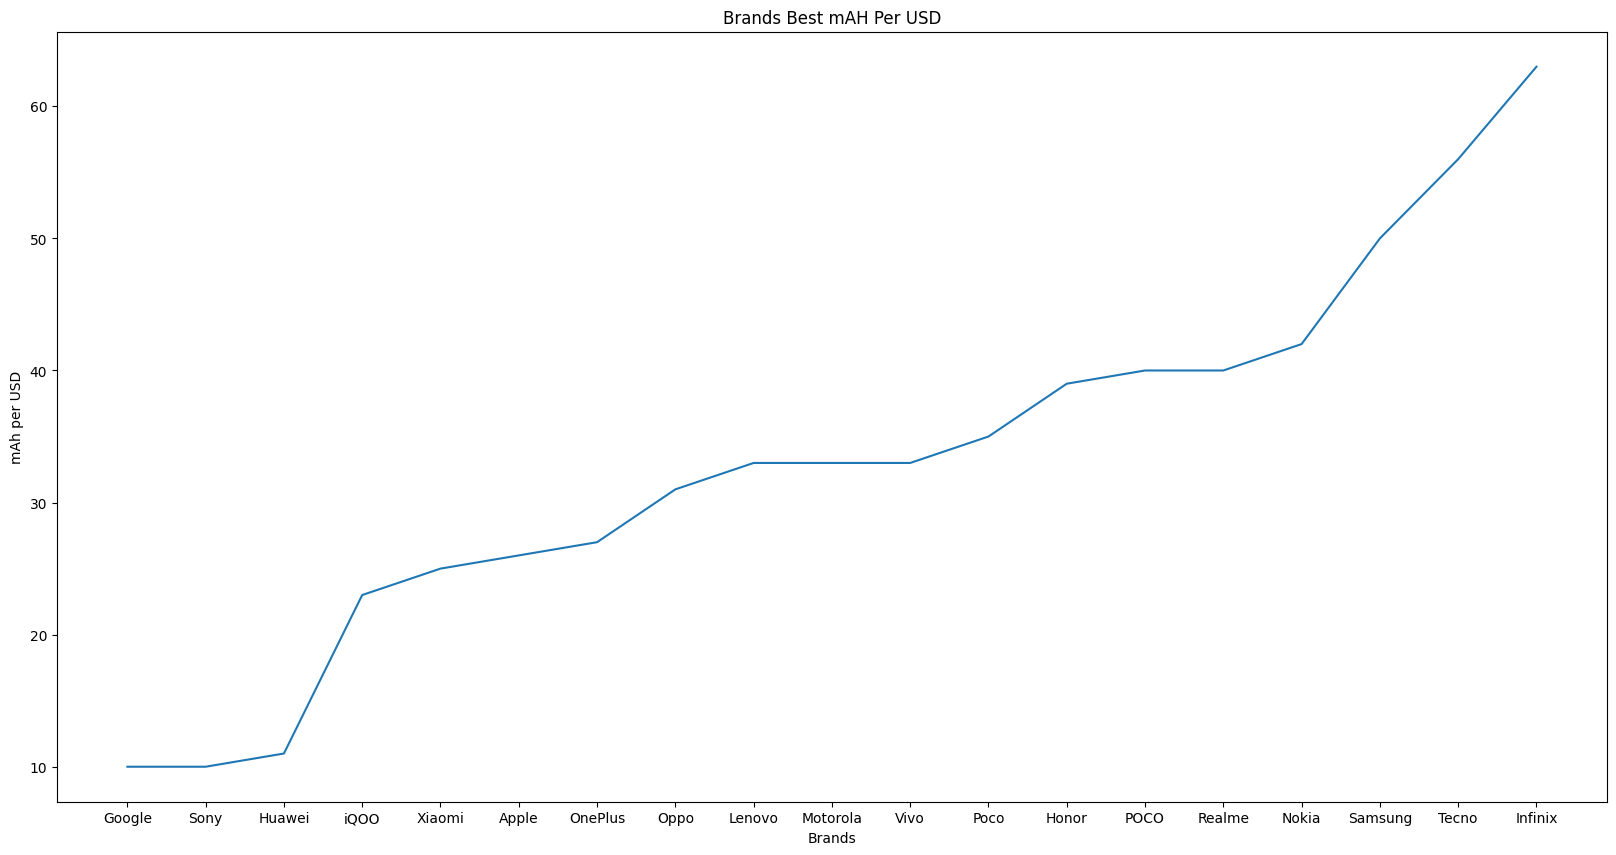

In [175]:
query = """
SELECT "Company Name", "Model Name", 
CAST(REPLACE(REPLACE("Launched Price (USA)", 'USD ', ''), ',', '') AS INT) AS PRICE, 
CAST(REPLACE(REPLACE("Battery Capacity", ',', ''), 'mAh', '') AS INT) AS BatteryCap,
CAST(CAST(CAST(REPLACE(REPLACE("Battery Capacity", ',', ''), 'mAh', '') AS FLOAT)/REPLACE(REPLACE("Launched Price (USA)", 'USD ', ''), ',', '') AS FLOAT) AS INT) AS BATRATIO
FROM Mobile m WHERE BATRATIO = (SELECT MAX(CAST(CAST(CAST(REPLACE(REPLACE("Battery Capacity", ',', ''), 'mAh', '') AS FLOAT)/REPLACE(REPLACE("Launched Price (USA)", 'USD ', ''), ',', '') AS FLOAT) AS INT)) FROM Mobile WHERE "Company Name" = m."Company Name")
GROUP BY "Company Name"
ORDER BY BATRATIO;
"""
BatRatio = pd.read_sql(query, connection)

plt.figure(figsize=(20,10))
plt.plot(BatRatio["Company Name"], BatRatio["BATRATIO"])
plt.title("Brands Best mAH Per USD")
plt.ylabel("mAh per USD")
plt.xlabel("Brands")
plt.show

Clean data to find brands best screen size to price ratio

In [179]:
%%sql
SELECT "Company Name", "Model Name", 
CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS INT) AS PRICE,
CAST(REPLACE(REPLACE("Screen Size", ",", ""), " inches","") AS FLOAT) AS ScreenSize,
CAST(CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS FLOAT)/CAST(REPLACE(REPLACE("Screen Size", ",", ""), " inches","") AS FLOAT) AS INT) AS SCREENRATIO
FROM Mobile m WHERE SCREENRATIO = (SELECT MIN(CAST(CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS FLOAT)/CAST(REPLACE(REPLACE("Screen Size", ",", ""), " inches","") AS FLOAT) AS INT)) FROM Mobile WHERE "Company Name" = m."Company Name")
GROUP BY "Company Name"
ORDER BY SCREENRATIO;

 * sqlite:///MobileDatabase.db
Done.


Company Name,Model Name,PRICE,ScreenSize,SCREENRATIO
Infinix,Smart HD 32GB,79,6.1,12
Samsung,Galaxy Tab E 10.1 16GB,129,10.1,12
Honor,Pad X8a Kids Edition,129,9.7,13
Tecno,Pop 9 64GB,89,6.52,13
Nokia,C22 64GB,119,6.5,18
Realme,Pad 2 Lite 64GB,190,10.4,18
Oppo,A49 5G 128GB,129,6.5,19
Lenovo,K13 32GB,149,6.52,22
Motorola,Moto G Play 32GB,149,6.5,22
POCO,M3 64GB,149,6.53,22


Present findings via line graph

<function matplotlib.pyplot.show(close=None, block=None)>

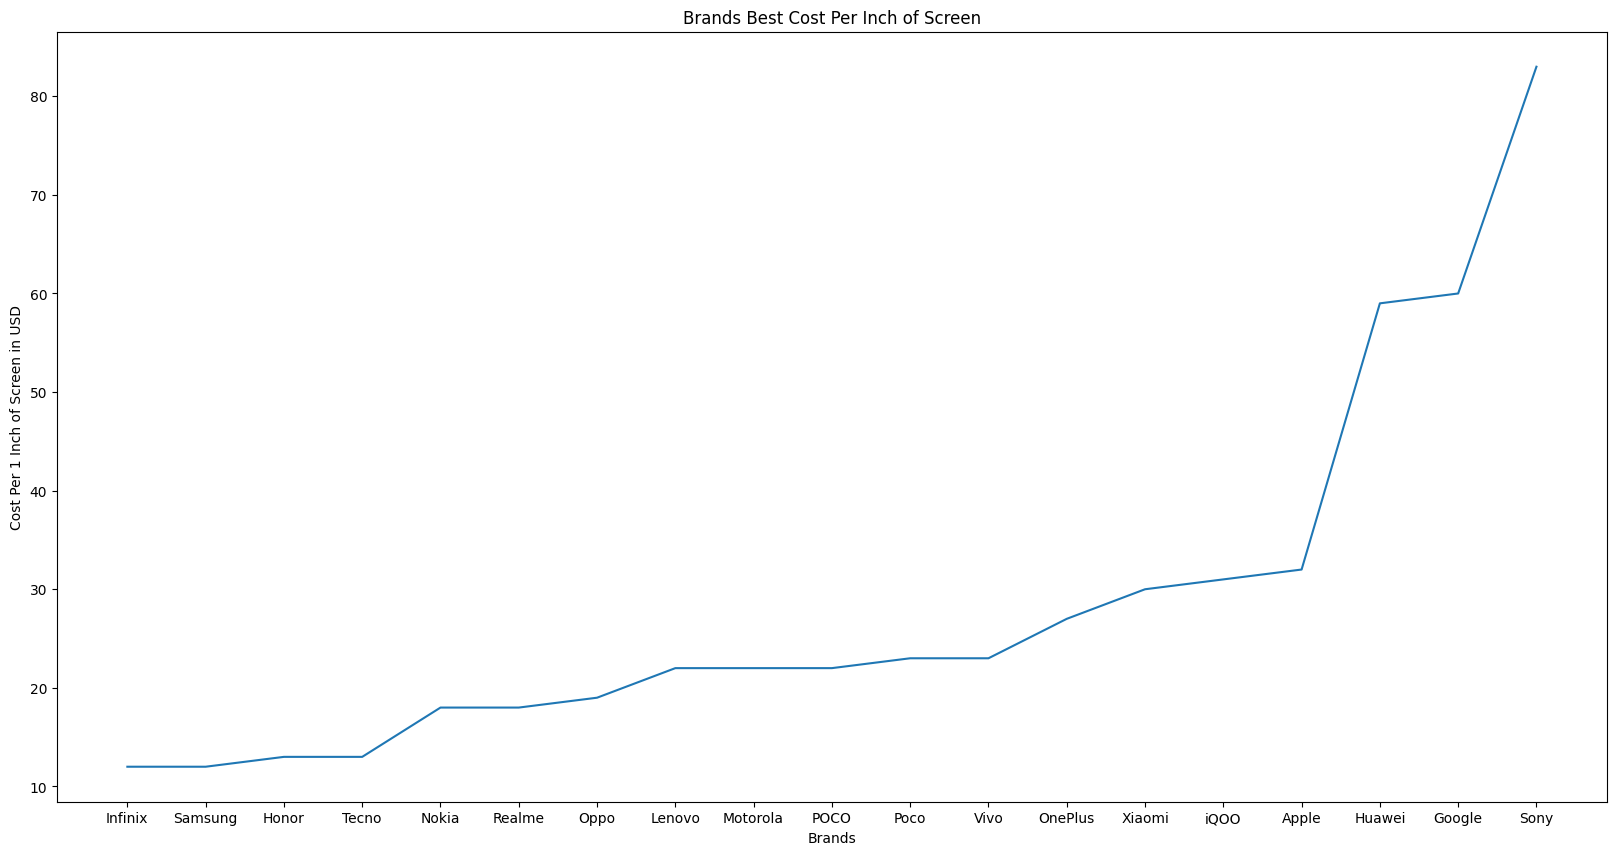

In [182]:
query = """
SELECT "Company Name", "Model Name", 
CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS INT) AS PRICE,
CAST(REPLACE(REPLACE("Screen Size", ",", ""), " inches","") AS FLOAT) AS ScreenSize,
CAST(CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS FLOAT)/CAST(REPLACE(REPLACE("Screen Size", ",", ""), " inches","") AS FLOAT) AS INT) AS SCREENRATIO
FROM Mobile m WHERE SCREENRATIO = (SELECT MIN(CAST(CAST(REPLACE(REPLACE("Launched Price (USA)", "USD ", ""), ",", "") AS FLOAT)/CAST(REPLACE(REPLACE("Screen Size", ",", ""), " inches","") AS FLOAT) AS INT)) FROM Mobile WHERE "Company Name" = m."Company Name")
GROUP BY "Company Name"
ORDER BY SCREENRATIO;
"""
ScreenRatio = pd.read_sql(query, connection)

plt.figure(figsize=(20,10))
plt.plot(ScreenRatio["Company Name"], ScreenRatio["SCREENRATIO"])
plt.title("Brands Best Cost Per Inch of Screen")
plt.ylabel("Cost Per 1 Inch of Screen in USD")
plt.xlabel("Brands")
plt.show